In [1]:
# install gym if you haven't yet
#!pip install gym

# Intro in reinforcement learning

In this tutorial you will touch on a few basic topics and mathematics behind a super cool and relevant area of machine learning called reinforcement learning.

You will learn a bit about:
- What reinforcement learning is
- Where you can apply it
- Which tools you can use
- Some theory behind the Q-table

And you will see a small demonstration where we go and solve the Frozen Lake problem.

After that you'll have enough background to try and solve your own Reinforcement Learning problem or to optimise the Frozen Lake example as shown in this hackathon/ tutorial.

## What is reinfocement learning?

Reinforcement learning is different from supervised and unsupervised learning. For example, in supervised learning you don't have references from a data set. This means that you cannot approximate a function based on some input to predict some output and learn from the error. Reinfocement learning is based on trial and error. In fact, we use an agent in a certain space or environment to generate feedback based on its own actions. Where in supervised learning the model cannot affect the input, in reinforcement learning the agent can affect its own observations. If you compare reinforcement learning with unsupervised learning you can see that RL requires feedback and unsupervised learning doesn't. 

A common dispiction of Reinforcement learning is:

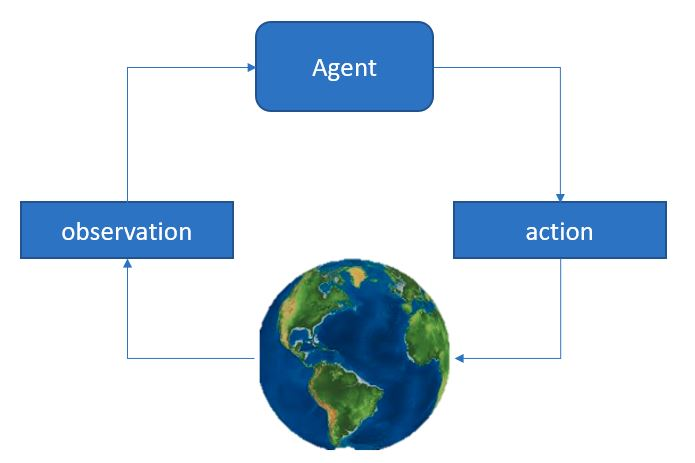


We have an agent in an environment and it can make a certain action within that environment. The agent gets feedback from the environment based on that action.

## Where can you apply reinforcement learning?

For every problem that can be overcome using trial-and error and is problem that can have a simulated environment (you don't want to try RL in a real self-driving car), reinforcement learning can be the answer. 

So, image you have build a robot. It has a few legs, it has a camera and it has all sorts of other sensors such as gyroscope configured as a falling sensor. Lets also give it control over its legs (action = voltage send to motor) so that it can move them. We then simply turn it on and give it no instructions except for that it gets punished for falling (as a way of mimicing pain when a real person falls) and to give it rewards when it reaches the other end of the room. At the first 1000 attempts it will just look like it simply will not learn to ever walk but then, maybe after 1001 attempts, it rises on all its legs and it will make its first step before falling again. After 100.000 attempts it will finaly reach the other end of the room and it has mastered walking without anyone telling how to it (programmatically).

## Which tools can you use?

You standard machine learning/ deep learning stack can be used for reinforcement learning. Think of Python with numpy and tensorflow. Today though we will use an extra library called gym from openai.

## Small tutorial - Frozen Lake

#!pip install gym

Winter is here. You and your friends were tossing around a frisbee at the park
    when you made a wild throw that left the frisbee out in the middle of the lake.
    The water is mostly frozen, but there are a few holes where the ice has melted.
    If you step into one of those holes, you'll fall into the freezing water.
    At this time, there's an international frisbee shortage, so it's absolutely imperative that
    you navigate across the lake and retrieve the disc.
    However, the ice is slippery, so you won't always move in the direction you intend.
    The surface is described using a grid like the following
    
        SFFF
        FHFH
        FFFH
        HFFG
        
    S : starting point, safe
    F : frozen surface, safe
    H : hole, fall to your doom
    G : goal, where the frisbee is located


In [2]:
# import libraries
import gym
import numpy as np
import time
import random

In [3]:
# create the world
env = gym.make('FrozenLake-v0')

In [4]:
# display the world
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


## We now have created a world. Let's see what we can within this world. 
#### We can extract some properties from the world by calling some classes:

In [5]:
print("Our world's space: ", env.observation_space.n)
print("The rendered world showed 4x4 states where we can live")

Our world's space:  16
The rendered world showed 4x4 states where we can live


In [6]:
print("Within our world we can perform just a few actions:")
print(env.action_space.n)

Within our world we can perform just a few actions:
4


In [7]:
#Let's try a step...
env.step(env.action_space.sample())
env.render()

  (Left)
SFFF
FHFH
FFFH
HFFG


In [8]:
# what can we get out of a step?
print(env.step(env.action_space.sample()))

(1, 0.0, False, {'prob': 0.3333333333333333})


We see that there's is some info coming out of a step. 

In [9]:
# Let's try to make a few steps:
env.reset()
done = False
i = 1
while not done:
    print("counter: ", i)
    action = env.action_space.sample() # take a random step
    s, r, done, _ = env.step(action) #State, reward, done or not, info (in this case raw probability of last state)
    print('State = {}, reward = {}, done = {}, info = {}'.format(s, r, done, _))
    env.render()
    i += 1
    time.sleep(.1)

counter:  1
State = 1, reward = 0.0, done = False, info = {'prob': 0.3333333333333333}
  (Down)
SFFF
FHFH
FFFH
HFFG
counter:  2
State = 0, reward = 0.0, done = False, info = {'prob': 0.3333333333333333}
  (Left)
SFFF
FHFH
FFFH
HFFG
counter:  3
State = 0, reward = 0.0, done = False, info = {'prob': 0.3333333333333333}
  (Up)
SFFF
FHFH
FFFH
HFFG
counter:  4
State = 0, reward = 0.0, done = False, info = {'prob': 0.3333333333333333}
  (Up)
SFFF
FHFH
FFFH
HFFG
counter:  5
State = 0, reward = 0.0, done = False, info = {'prob': 0.3333333333333333}
  (Up)
SFFF
FHFH
FFFH
HFFG
counter:  6
State = 0, reward = 0.0, done = False, info = {'prob': 0.3333333333333333}
  (Up)
SFFF
FHFH
FFFH
HFFG
counter:  7
State = 0, reward = 0.0, done = False, info = {'prob': 0.3333333333333333}
  (Down)
SFFF
FHFH
FFFH
HFFG
counter:  8
State = 0, reward = 0.0, done = False, info = {'prob': 0.3333333333333333}
  (Up)
SFFF
FHFH
FFFH
HFFG
counter:  9
State = 4, reward = 0.0, done = False, info = {'prob': 0.3333333333333

## How can we learn our agent to not step into a hole?

There are a few options but I will stick to one since that is a very common one and also useful in lots of other machine learning properties.

## Enter Q-learning

Q-learning is an algo that learns what to do under certain conditions. As an example and using the agent and state in the predecessing example: The agent starts at 'S' and it depends on its policy to know where to go now to make sure it receives the highest reward. Q-learning helps by optimising this policy by calculating the expected value of the total reward. Since every step on the frozen lake returns a certain reward (0.0) or a high reward once it makes it to the end. The agent gets a sence of what it should do in order to make it to the end.

So the main idea about Q-learning is that the agent tries a lot of steps, checks the result of that step by looking at what the environment returns.

The formula is:

\begin{equation*}
Q(s_t,a_t) \leftarrow (1-\alpha_t)Q(s_t,a_t) + \alpha_t[R(s) + \gamma \displaystyle \max_{a} \displaystyle{Q(s_{t+1}, a)}]
\end{equation*}


where the left part of the arrow $Q(s_t, a_t)$ is the updated Q table. $s_t$ is the state and $a_t$ is the action.  The $\alpha_t$ is the learning rate. the $\gamma$ is the discount rate, usually (read:always) a number below 1 but higher than zero. With $\gamma$ we control the effect of future reward. Looking at the equation you can see that if $\gamma$ approaches zero, the agent will like immediate reward over delayed reward. If $\gamma$ approaches one, the opposite will happen and the agent will strive to seek for future delayed reward. So, near zero: agent will be like a child (a child as closer to zero) and it will be looking for short term reward in the form of sugar. Near one: the agent will remain calm while seeing candy and sugar and will contemplate its future reward. So, consider $\gamma$ as the age of the agent.

We also use an $\epsilon$ as a way to allow the agent to randomly select an action or to pick a value from the Q-table. Any ideas why this can be useful?

An $\epsilon$ is useful because it might help the agent to explore the environment instead of always going to way it always follows. In the beginning we use a very high $\epsilon$. This is because we need the agent to know where to begin, it needs to explore before it can exploit. Explore and exploit are also the terms we use for this principle. Another way of seeing the $\epsilon$ is as a greed controler. If you want your agent to be greedy, you set your $\epsilon$ high. It will then try to satisfy itself by constantly checking if it can somehow optimise its reward by looking at other places. It's like someone who is always looking for the restaurant in town and once it thinks it has found one, it needs to find the best place inside that restaurant and then it needs to find the best drink etc. etc. A real greedy explorer.

## A bit more intuition

Q-learning is used to create a policy. Policy is reinfocement learning is denoted as $\pi$. Let's have a look at our the environment in more detail.

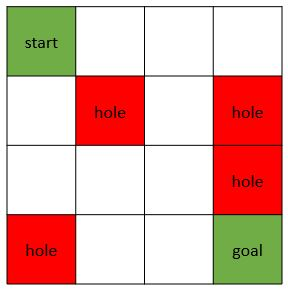

So, this is a better visual on the world. Intuitively we know where we would go but, our agent has no idea at the beginning. That is the whole thing where Reinforcement Learning is about. We need the agent to generate his own data and learn from that. 

We should have our agent to learn a policy $\pi$ so that it knows what to do in every state it might get into. so it should teach itself to know this:

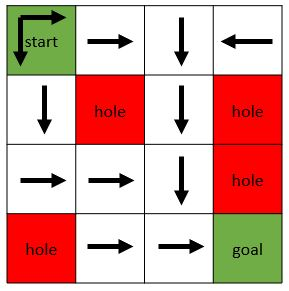

We give our agent a state and the policy $\pi$ tells it what to do. So our co-ordinates 0,0 - our starting position - might say to go either up, down, left or right. In the example above it might say to go down when in state 0,0. Then, it enters a new state, the agent observse the state and knows it is in state 0,1. The policy then dictates to go down again. etc. etc.

In [10]:
# let's initiate a Q-table of the size of the observations and the actions

Q = np.zeros([env.observation_space.n, env.action_space.n])
Q.shape

(16, 4)

Now we have a Q-table we need our agent to fill it with information.

In [11]:
# Let's set some hyper-parameters
alpha = 0.5 # our learning rate
gamma = 0.6 # discount factor - importance we give to future rewards - setting the age of agent :)
epsilon = 0.9 # exploiting parameter - Will it be greedy or not? 

In [12]:
rew_list = [] # a list we later use to calculate the reward per episode

episodes = 5000

for i in range(episodes):
    state = env.reset()
    done = False
    rewards = 0
    epochs = 0
    j = 0 # create a counter to have a sense of how long a round took
    while not done: # it is done when the agent does something stupid as falling in a hole or when it reaches the goal.
        if random.uniform(0,1) < epsilon: # if the random number is smaller than the greedy param:
            # Make a random choice
            action = env.action_space.sample()
        else:
            # Make an educated guess and pick one from the Q-table
            action = np.argmax(Q[state])
        
        # Perform a step using the defined action above
        next_state, reward, done, info = env.step(action)
        
        # Now we made a step, let's store our old data in the Q-table
        old_value = Q[state, action]
        
        # our estimate of the max reward 
        next_max = np.max(Q[next_state])
        
        # Update our Q-table with the formula above
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        
        # and change the Q-table accordingly
        Q[state, action] = new_value
        
        # update old state with the new state
        state = next_state
        
        # let's keep a little track of each episode
        rewards += r
        epochs += 1
        
        j += 1 # print steps before it was finished
        
        
               
    print('this time it took ', j, ' steps to finish')    
    # Add some learning rate  and epsilon decay:
    if i % 10 == 0:
        print("We are at episode: ", i)
        epsilon = epsilon * 0.999
        alpha = alpha * 0.999
        print(r)
        
    rew_list.append(rewards)

print('\nTraining is done\n')
print('\nReward sum of all episodes ' + str(sum(rew_list)/episodes))

print('\n',Q)

this time it took  7  steps to finish
We are at episode:  0
0.0
this time it took  18  steps to finish
this time it took  12  steps to finish
this time it took  5  steps to finish
this time it took  9  steps to finish
this time it took  17  steps to finish
this time it took  3  steps to finish
this time it took  10  steps to finish
this time it took  5  steps to finish
this time it took  22  steps to finish
this time it took  4  steps to finish
We are at episode:  10
0.0
this time it took  5  steps to finish
this time it took  3  steps to finish
this time it took  5  steps to finish
this time it took  5  steps to finish
this time it took  4  steps to finish
this time it took  6  steps to finish
this time it took  3  steps to finish
this time it took  3  steps to finish
this time it took  18  steps to finish
this time it took  4  steps to finish
We are at episode:  20
0.0
this time it took  5  steps to finish
this time it took  8  steps to finish
this time it took  13  steps to finish
t

We are at episode:  250
0.0
this time it took  10  steps to finish
this time it took  29  steps to finish
this time it took  9  steps to finish
this time it took  3  steps to finish
this time it took  8  steps to finish
this time it took  2  steps to finish
this time it took  22  steps to finish
this time it took  17  steps to finish
this time it took  6  steps to finish
this time it took  2  steps to finish
We are at episode:  260
0.0
this time it took  9  steps to finish
this time it took  2  steps to finish
this time it took  2  steps to finish
this time it took  4  steps to finish
this time it took  2  steps to finish
this time it took  4  steps to finish
this time it took  4  steps to finish
this time it took  9  steps to finish
this time it took  9  steps to finish
this time it took  3  steps to finish
We are at episode:  270
0.0
this time it took  10  steps to finish
this time it took  2  steps to finish
this time it took  5  steps to finish
this time it took  14  steps to finis

this time it took  6  steps to finish
this time it took  12  steps to finish
this time it took  6  steps to finish
this time it took  16  steps to finish
this time it took  2  steps to finish
this time it took  14  steps to finish
this time it took  5  steps to finish
this time it took  3  steps to finish
We are at episode:  560
0.0
this time it took  13  steps to finish
this time it took  5  steps to finish
this time it took  5  steps to finish
this time it took  14  steps to finish
this time it took  13  steps to finish
this time it took  6  steps to finish
this time it took  10  steps to finish
this time it took  4  steps to finish
this time it took  8  steps to finish
this time it took  10  steps to finish
We are at episode:  570
0.0
this time it took  10  steps to finish
this time it took  9  steps to finish
this time it took  9  steps to finish
this time it took  7  steps to finish
this time it took  11  steps to finish
this time it took  6  steps to finish
this time it took  10 

this time it took  29  steps to finish
this time it took  2  steps to finish
this time it took  10  steps to finish
this time it took  2  steps to finish
this time it took  2  steps to finish
this time it took  14  steps to finish
this time it took  7  steps to finish
this time it took  19  steps to finish
this time it took  2  steps to finish
We are at episode:  810
0.0
this time it took  2  steps to finish
this time it took  2  steps to finish
this time it took  2  steps to finish
this time it took  16  steps to finish
this time it took  14  steps to finish
this time it took  8  steps to finish
this time it took  2  steps to finish
this time it took  4  steps to finish
this time it took  4  steps to finish
this time it took  10  steps to finish
We are at episode:  820
0.0
this time it took  8  steps to finish
this time it took  12  steps to finish
this time it took  5  steps to finish
this time it took  15  steps to finish
this time it took  11  steps to finish
this time it took  33 

this time it took  6  steps to finish
this time it took  5  steps to finish
this time it took  12  steps to finish
We are at episode:  1010
0.0
this time it took  17  steps to finish
this time it took  17  steps to finish
this time it took  12  steps to finish
this time it took  5  steps to finish
this time it took  7  steps to finish
this time it took  27  steps to finish
this time it took  8  steps to finish
this time it took  4  steps to finish
this time it took  5  steps to finish
this time it took  5  steps to finish
We are at episode:  1020
0.0
this time it took  2  steps to finish
this time it took  2  steps to finish
this time it took  13  steps to finish
this time it took  11  steps to finish
this time it took  3  steps to finish
this time it took  21  steps to finish
this time it took  8  steps to finish
this time it took  12  steps to finish
this time it took  9  steps to finish
this time it took  2  steps to finish
We are at episode:  1030
0.0
this time it took  8  steps to

this time it took  9  steps to finish
this time it took  6  steps to finish
this time it took  10  steps to finish
this time it took  11  steps to finish
this time it took  9  steps to finish
this time it took  2  steps to finish
this time it took  9  steps to finish
this time it took  3  steps to finish
this time it took  6  steps to finish
this time it took  5  steps to finish
We are at episode:  1240
0.0
this time it took  8  steps to finish
this time it took  11  steps to finish
this time it took  27  steps to finish
this time it took  6  steps to finish
this time it took  8  steps to finish
this time it took  25  steps to finish
this time it took  2  steps to finish
this time it took  6  steps to finish
this time it took  9  steps to finish
this time it took  2  steps to finish
We are at episode:  1250
0.0
this time it took  4  steps to finish
this time it took  7  steps to finish
this time it took  7  steps to finish
this time it took  2  steps to finish
this time it took  5  ste

this time it took  3  steps to finish
this time it took  10  steps to finish
this time it took  6  steps to finish
this time it took  10  steps to finish
this time it took  2  steps to finish
this time it took  4  steps to finish
this time it took  6  steps to finish
this time it took  13  steps to finish
this time it took  2  steps to finish
this time it took  12  steps to finish
We are at episode:  1470
0.0
this time it took  6  steps to finish
this time it took  9  steps to finish
this time it took  9  steps to finish
this time it took  10  steps to finish
this time it took  23  steps to finish
this time it took  6  steps to finish
this time it took  4  steps to finish
this time it took  7  steps to finish
this time it took  4  steps to finish
this time it took  8  steps to finish
We are at episode:  1480
0.0
this time it took  3  steps to finish
this time it took  4  steps to finish
this time it took  2  steps to finish
this time it took  4  steps to finish
this time it took  9  st

this time it took  6  steps to finish
this time it took  5  steps to finish
this time it took  5  steps to finish
this time it took  2  steps to finish
this time it took  3  steps to finish
this time it took  13  steps to finish
this time it took  7  steps to finish
We are at episode:  1770
0.0
this time it took  8  steps to finish
this time it took  8  steps to finish
this time it took  3  steps to finish
this time it took  7  steps to finish
this time it took  4  steps to finish
this time it took  14  steps to finish
this time it took  4  steps to finish
this time it took  7  steps to finish
this time it took  8  steps to finish
this time it took  12  steps to finish
We are at episode:  1780
0.0
this time it took  5  steps to finish
this time it took  14  steps to finish
this time it took  4  steps to finish
this time it took  5  steps to finish
this time it took  11  steps to finish
this time it took  6  steps to finish
this time it took  12  steps to finish
this time it took  8  st

this time it took  6  steps to finish
this time it took  5  steps to finish
We are at episode:  2220
0.0
this time it took  8  steps to finish
this time it took  15  steps to finish
this time it took  2  steps to finish
this time it took  2  steps to finish
this time it took  9  steps to finish
this time it took  5  steps to finish
this time it took  3  steps to finish
this time it took  12  steps to finish
this time it took  24  steps to finish
this time it took  4  steps to finish
We are at episode:  2230
0.0
this time it took  2  steps to finish
this time it took  2  steps to finish
this time it took  22  steps to finish
this time it took  9  steps to finish
this time it took  7  steps to finish
this time it took  2  steps to finish
this time it took  5  steps to finish
this time it took  7  steps to finish
this time it took  4  steps to finish
this time it took  4  steps to finish
We are at episode:  2240
0.0
this time it took  6  steps to finish
this time it took  2  steps to fini

this time it took  9  steps to finish
this time it took  12  steps to finish
this time it took  18  steps to finish
this time it took  17  steps to finish
this time it took  6  steps to finish
this time it took  4  steps to finish
this time it took  8  steps to finish
this time it took  5  steps to finish
this time it took  29  steps to finish
this time it took  14  steps to finish
We are at episode:  2530
0.0
this time it took  12  steps to finish
this time it took  3  steps to finish
this time it took  3  steps to finish
this time it took  2  steps to finish
this time it took  5  steps to finish
this time it took  4  steps to finish
this time it took  7  steps to finish
this time it took  3  steps to finish
this time it took  24  steps to finish
this time it took  11  steps to finish
We are at episode:  2540
0.0
this time it took  16  steps to finish
this time it took  7  steps to finish
this time it took  8  steps to finish
this time it took  6  steps to finish
this time it took  9 

this time it took  6  steps to finish
this time it took  23  steps to finish
this time it took  4  steps to finish
this time it took  10  steps to finish
this time it took  2  steps to finish
this time it took  5  steps to finish
this time it took  11  steps to finish
We are at episode:  2830
0.0
this time it took  7  steps to finish
this time it took  3  steps to finish
this time it took  6  steps to finish
this time it took  7  steps to finish
this time it took  9  steps to finish
this time it took  12  steps to finish
this time it took  19  steps to finish
this time it took  7  steps to finish
this time it took  2  steps to finish
this time it took  2  steps to finish
We are at episode:  2840
0.0
this time it took  11  steps to finish
this time it took  3  steps to finish
this time it took  5  steps to finish
this time it took  2  steps to finish
this time it took  5  steps to finish
this time it took  9  steps to finish
this time it took  6  steps to finish
this time it took  3  st

this time it took  10  steps to finish
this time it took  26  steps to finish
this time it took  4  steps to finish
We are at episode:  3130
0.0
this time it took  22  steps to finish
this time it took  3  steps to finish
this time it took  8  steps to finish
this time it took  5  steps to finish
this time it took  25  steps to finish
this time it took  4  steps to finish
this time it took  4  steps to finish
this time it took  8  steps to finish
this time it took  4  steps to finish
this time it took  9  steps to finish
We are at episode:  3140
0.0
this time it took  5  steps to finish
this time it took  5  steps to finish
this time it took  8  steps to finish
this time it took  6  steps to finish
this time it took  18  steps to finish
this time it took  9  steps to finish
this time it took  5  steps to finish
this time it took  7  steps to finish
this time it took  11  steps to finish
this time it took  12  steps to finish
We are at episode:  3150
0.0
this time it took  12  steps to 

this time it took  9  steps to finish
this time it took  8  steps to finish
this time it took  5  steps to finish
this time it took  6  steps to finish
We are at episode:  3560
0.0
this time it took  13  steps to finish
this time it took  7  steps to finish
this time it took  3  steps to finish
this time it took  24  steps to finish
this time it took  4  steps to finish
this time it took  3  steps to finish
this time it took  7  steps to finish
this time it took  4  steps to finish
this time it took  4  steps to finish
this time it took  4  steps to finish
We are at episode:  3570
0.0
this time it took  2  steps to finish
this time it took  6  steps to finish
this time it took  4  steps to finish
this time it took  13  steps to finish
this time it took  2  steps to finish
this time it took  12  steps to finish
this time it took  9  steps to finish
this time it took  15  steps to finish
this time it took  3  steps to finish
this time it took  9  steps to finish
We are at episode:  3580


this time it took  8  steps to finish
this time it took  10  steps to finish
this time it took  2  steps to finish
We are at episode:  3760
0.0
this time it took  9  steps to finish
this time it took  5  steps to finish
this time it took  2  steps to finish
this time it took  4  steps to finish
this time it took  9  steps to finish
this time it took  6  steps to finish
this time it took  4  steps to finish
this time it took  3  steps to finish
this time it took  14  steps to finish
this time it took  8  steps to finish
We are at episode:  3770
0.0
this time it took  3  steps to finish
this time it took  6  steps to finish
this time it took  4  steps to finish
this time it took  10  steps to finish
this time it took  21  steps to finish
this time it took  6  steps to finish
this time it took  16  steps to finish
this time it took  12  steps to finish
this time it took  9  steps to finish
this time it took  6  steps to finish
We are at episode:  3780
0.0
this time it took  15  steps to f

this time it took  7  steps to finish
this time it took  6  steps to finish
this time it took  15  steps to finish
this time it took  14  steps to finish
this time it took  7  steps to finish
We are at episode:  4040
0.0
this time it took  2  steps to finish
this time it took  14  steps to finish
this time it took  7  steps to finish
this time it took  4  steps to finish
this time it took  6  steps to finish
this time it took  15  steps to finish
this time it took  11  steps to finish
this time it took  6  steps to finish
this time it took  4  steps to finish
this time it took  3  steps to finish
We are at episode:  4050
0.0
this time it took  13  steps to finish
this time it took  18  steps to finish
this time it took  11  steps to finish
this time it took  8  steps to finish
this time it took  5  steps to finish
this time it took  8  steps to finish
this time it took  14  steps to finish
this time it took  2  steps to finish
this time it took  10  steps to finish
this time it took  5

this time it took  12  steps to finish
this time it took  13  steps to finish
We are at episode:  4290
0.0
this time it took  2  steps to finish
this time it took  20  steps to finish
this time it took  4  steps to finish
this time it took  3  steps to finish
this time it took  6  steps to finish
this time it took  10  steps to finish
this time it took  15  steps to finish
this time it took  15  steps to finish
this time it took  5  steps to finish
this time it took  18  steps to finish
We are at episode:  4300
0.0
this time it took  14  steps to finish
this time it took  7  steps to finish
this time it took  16  steps to finish
this time it took  13  steps to finish
this time it took  8  steps to finish
this time it took  2  steps to finish
this time it took  7  steps to finish
this time it took  12  steps to finish
this time it took  11  steps to finish
this time it took  10  steps to finish
We are at episode:  4310
0.0
this time it took  5  steps to finish
this time it took  8  step

this time it took  3  steps to finish
We are at episode:  4490
0.0
this time it took  6  steps to finish
this time it took  15  steps to finish
this time it took  2  steps to finish
this time it took  7  steps to finish
this time it took  33  steps to finish
this time it took  11  steps to finish
this time it took  2  steps to finish
this time it took  16  steps to finish
this time it took  6  steps to finish
this time it took  2  steps to finish
We are at episode:  4500
0.0
this time it took  2  steps to finish
this time it took  12  steps to finish
this time it took  7  steps to finish
this time it took  2  steps to finish
this time it took  17  steps to finish
this time it took  7  steps to finish
this time it took  8  steps to finish
this time it took  8  steps to finish
this time it took  2  steps to finish
this time it took  21  steps to finish
We are at episode:  4510
0.0
this time it took  2  steps to finish
this time it took  13  steps to finish
this time it took  13  steps to

this time it took  9  steps to finish
this time it took  6  steps to finish
this time it took  10  steps to finish
this time it took  12  steps to finish
this time it took  3  steps to finish
this time it took  11  steps to finish
this time it took  6  steps to finish
We are at episode:  4900
0.0
this time it took  8  steps to finish
this time it took  7  steps to finish
this time it took  6  steps to finish
this time it took  8  steps to finish
this time it took  5  steps to finish
this time it took  16  steps to finish
this time it took  7  steps to finish
this time it took  9  steps to finish
this time it took  10  steps to finish
this time it took  11  steps to finish
We are at episode:  4910
0.0
this time it took  7  steps to finish
this time it took  7  steps to finish
this time it took  14  steps to finish
this time it took  9  steps to finish
this time it took  7  steps to finish
this time it took  8  steps to finish
this time it took  9  steps to finish
this time it took  4  s

## Results

So we have now used 5000 episodes to update the Q-table with values that uses the agent to see what to do in a certain circumstance. We have only 16 states and in every one of them it can perform a certain action. If we examine the Q-table you find higher and lower values per row. Each value on the row stands for what to do to maximise future reward by going either up, down, left or right (the 4 actions that can be taken) if the highest value stands for going down and the agent picked the state from the Q-table (controlled by the epsilon) it believes its future highest reward comes from going down now.

## Evaluation of our agent

Of course, above is still a bit abstract. Therefor let's see how our agent performs over 100 episodes using the Q-table

In [13]:
"""Evaluate agent's performance after Q-learning"""

total_epochs = 0
episodes = 50
frames = []

for _ in range(episodes):
    #print(_)
    state = env.reset()
    #print('state created')
    epochs, reward = 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(Q[state])
        state, reward, done, info = env.step(action)
        

        frames.append({
        'episode': _,
        'frame': env.render(mode='ansi'),
        'state': state,
        'reward': reward,
        })

        epochs += 1

    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")

Results after 50 episodes:
Average timesteps per episode: 4.76


In [14]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(f"Episode: {frame['episode']}")
        print(frame['frame'].getvalue())
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Reward: {frame['reward']}")
        
        sleep(.1)
        
print_frames(frames)

Episode: 49
  (Left)
SFFF
FHFH
FFFH
HFFG

Timestep: 238
State: 7
Reward: 0.0


# Conclusion

Do we believe our agent is optimal? 

Think of stuff that can be improved, been done differently. As an example: 
- Find the optimum hyper parameters ($\gamma$, $\alpha$, $\epsilon$)
- Adjust the default reward and penalty system for this environment